# ------------------------------------------MINI PROJECT------------------------------------------------
Mini Project on data Analysis:  Identify problem statement. Use Semi or unstructured data set. 
Define 3 to 4 objectives:-
Perform 1. Data Interpretation
2. Data preprocessing
3. Data Modeling (perform both Descriptive and Predictive analysis, Also perform Prescriptive Analysis (if required and fits for the data set))
4.Data visualization

# -------------------------------------DATA INTERPRETATION---------------------------------------

In [1]:
# IMPORTING DATA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
import seaborn as sb
import sklearn
from scipy.stats import pearsonr
from bokeh.io import output_notebook
from bokeh.plotting import figure, show, ColumnDataSource
output_notebook()
# import machine learning library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier

Loading BokehJS ...

## READING MY DATASET

In [2]:
auto = pd.read_csv("Automobile_data.csv") 

## PRINTING MY DATA

In [3]:
auto

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


## DESCRIBING MY DATASET

In [4]:
auto.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


## PRINTING MY TOP FIVE DATA

In [5]:
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


## PRINTING MY BOTTOM FIVE DATA

In [6]:
auto.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


## INDEXING OF DATA

In [7]:
auto[:10]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?


## INDEXING WITHIN LIMITS OF DATA

In [8]:
auto[5:10]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?


## SORTING OF DATA

In [9]:
auto.sort_values('horsepower')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
42,1,107,honda,gas,std,two,sedan,fwd,front,96.5,...,110,2bbl,3.15,3.58,9.1,100,5500,25,31,10345
188,2,94,volkswagen,gas,std,four,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.4,10.0,100,5500,26,32,9995
41,0,85,honda,gas,std,four,sedan,fwd,front,96.5,...,110,mpfi,3.15,3.58,9.0,101,5800,24,28,12945
11,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16925
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,0,?,peugot,gas,std,four,wagon,rwd,front,114.2,...,120,mpfi,3.46,3.19,8.4,97,5000,19,24,12440
107,0,161,peugot,gas,std,four,sedan,rwd,front,107.9,...,120,mpfi,3.46,3.19,8.4,97,5000,19,24,11900
99,0,106,nissan,gas,std,four,hatchback,fwd,front,97.2,...,120,2bbl,3.33,3.47,8.5,97,5200,27,34,8949
130,0,?,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,?,?,23,31,9295


## CHECKING OF DATATYPES

In [10]:
auto.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

## COUNTING UNIQUE VALUE OF DATA

In [11]:
auto['highway-mpg'].nunique()

30

## TO COUNT THE VALUES

In [12]:
auto['stroke'].value_counts()

3.4     20
3.03    14
3.15    14
3.23    14
3.39    13
2.64    11
3.35     9
3.29     9
3.46     8
3.41     6
3.19     6
3.58     6
3.27     6
3.07     6
3.11     6
3.5      6
3.64     5
3.52     5
3.86     4
3.47     4
?        4
3.54     4
2.9      3
3.9      3
2.68     2
4.17     2
3.1      2
2.19     2
3.08     2
2.8      2
2.87     1
2.76     1
3.16     1
3.12     1
3.21     1
2.36     1
2.07     1
Name: stroke, dtype: int64

## FORMATING OF DATA

In [13]:
pd.options.display.float_format = '{:.2f}'.format
print(auto)

     symboling normalized-losses         make fuel-type aspiration  \
0            3                 ?  alfa-romero       gas        std   
1            3                 ?  alfa-romero       gas        std   
2            1                 ?  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
..         ...               ...          ...       ...        ...   
200         -1                95        volvo       gas        std   
201         -1                95        volvo       gas      turbo   
202         -1                95        volvo       gas        std   
203         -1                95        volvo    diesel      turbo   
204         -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front       88.60  ...   
1

## IDENTIFYING MISSING VALUES

In [14]:
auto.isnull()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## IDENTIFYING MISSING VALUES IN TOTAL DATASET

In [15]:
auto.isnull().sum().sum()

0

## CONVERTING VARIABLE DATATYPE FROM INTEGER TO FLOATING VALUE

In [16]:
auto['engine-size']=auto['curb-weight'].astype('float')
auto.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size          float64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

# --------------------------------------STATISTICS SUMMARY----------------------------------------

## MEAN VALUE

In [17]:
auto.mean()

symboling              0.83
wheel-base            98.76
length               174.05
width                 65.91
height                53.72
curb-weight         2555.57
engine-size         2555.57
compression-ratio     10.14
city-mpg              25.22
highway-mpg           30.75
dtype: float64

## MEDIAN VALUE

In [18]:
auto.median()

symboling              1.00
wheel-base            97.00
length               173.20
width                 65.50
height                54.10
curb-weight         2414.00
engine-size         2414.00
compression-ratio      9.00
city-mpg              24.00
highway-mpg           30.00
dtype: float64

## MODE VALUE

In [19]:
auto.mode()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,?,toyota,gas,std,four,sedan,fwd,front,94.50,...,2385.00,mpfi,3.62,3.4,9.00,68,5500,31,25,?


## MINIMUM VALUE

In [20]:
auto[['symboling','wheel-base','length','height','width','engine-size','curb-weight','city-mpg','highway-mpg']].min()

symboling       -2.00
wheel-base      86.60
length         141.10
height          47.80
width           60.30
engine-size   1488.00
curb-weight   1488.00
city-mpg        13.00
highway-mpg     16.00
dtype: float64

## MAXIMUM VALUE

In [21]:
auto[['symboling','wheel-base','length','height','width','engine-size','curb-weight','city-mpg','highway-mpg']].max()

symboling        3.00
wheel-base     120.90
length         208.10
height          59.80
width           72.30
engine-size   4066.00
curb-weight   4066.00
city-mpg        49.00
highway-mpg     54.00
dtype: float64

## VARIANCE VALUE

In [22]:
auto[['symboling','wheel-base','length','height','width','engine-size','curb-weight','city-mpg','highway-mpg']].var()

symboling          1.55
wheel-base        36.26
length           152.21
height             5.97
width              4.60
engine-size   271107.87
curb-weight   271107.87
city-mpg          42.80
highway-mpg       47.42
dtype: float64

## STANDARD DEVIATION VALUE

In [23]:
auto[['symboling','wheel-base','length','height','width','engine-size','curb-weight','city-mpg','highway-mpg']].std()

symboling       1.25
wheel-base      6.02
length         12.34
height          2.44
width           2.15
engine-size   520.68
curb-weight   520.68
city-mpg        6.54
highway-mpg     6.89
dtype: float64

## PERCENTILE VALUE

In [24]:
auto.quantile(q=0.5,axis=0)

symboling              1.00
wheel-base            97.00
length               173.20
width                 65.50
height                54.10
curb-weight         2414.00
engine-size         2414.00
compression-ratio      9.00
city-mpg              24.00
highway-mpg           30.00
Name: 0.5, dtype: float64

# -------------------------------------DATA PREPROCESSING---------------------------------------

# DATA CLEANING

In [25]:
auto['normalized-losses']

0        ?
1        ?
2        ?
3      164
4      164
      ... 
200     95
201     95
202     95
203     95
204     95
Name: normalized-losses, Length: 205, dtype: object

In [26]:
auto['normalized-losses'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Name: normalized-losses, Length: 205, dtype: bool

In [27]:
missing_values = ["?"]
auto = pd.read_csv("Automobile_data.csv", na_values= missing_values)

***********MISSING VALUES**************

In [28]:
auto['normalized-losses'].isnull()

0       True
1       True
2       True
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Name: normalized-losses, Length: 205, dtype: bool

*********MISSING VALUES*************

In [29]:
auto.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

# DATA INTERGRATION

In [76]:
auto.make.value_counts()

toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
subaru           12
volkswagen       12
peugot           11
volvo            11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
saab              6
audi              6
porsche           4
chevrolet         3
jaguar            3
alfa-romero       2
isuzu             2
mercury           1
Name: make, dtype: int64

<AxesSubplot:>

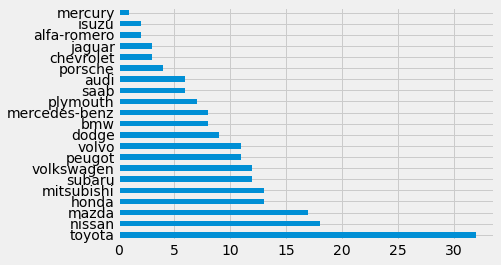

In [77]:
auto.make.value_counts().plot(kind='barh')

In [30]:
p1 = auto[['body-style', 'price']].groupby(['body-style'], as_index=False).mean().sort_values(by='price', ascending=False)
p1

,body-style,price
1,hardtop,22208.50
0,convertible,21890.50
3,sedan,14459.76
4,wagon,12371.96
2,hatchback,9957.44


In [31]:
p2 = auto.merge(p1)
p2

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


In [32]:
 auto[['num-of-doors', 'price']].groupby(['num-of-doors'], as_index=False).mean().sort_values(by='price', ascending=False)

,num-of-doors,price
0,four,13565.67
1,two,12818.13


In [33]:
auto[['make', 'price']].groupby(['make'], as_index=False).mean().sort_values(by='price', ascending=False)

,make,price
7,jaguar,34600.00
9,mercedes-benz,33647.00
15,porsche,31400.50
2,bmw,26118.75
21,volvo,18063.18
1,audi,17859.17
10,mercury,16503.00
0,alfa-romero,15498.33
13,peugot,15489.09
17,saab,15223.33


In [34]:
auto[['fuel-type', 'price']].groupby(['fuel-type'], as_index=False).mean().sort_values(by='price', ascending=False)

,fuel-type,price
0,diesel,15838.15
1,gas,12916.41


In [35]:
auto[['drive-wheels', 'price']].groupby(['drive-wheels'], as_index=False).mean().sort_values(by='price', ascending=False)

,drive-wheels,price
2,rwd,19757.61
0,4wd,10241.00
1,fwd,9244.78


In [36]:
auto[['num-of-cylinders', 'price']].groupby(['num-of-cylinders'], as_index=False).mean().sort_values(by='price', ascending=False)

,num-of-cylinders,price
0,eight,38900.00
5,twelve,36000.00
3,six,23671.83
1,five,22007.60
6,two,13020.00
2,four,10303.20
4,three,5151.00


In [37]:
auto.groupby(["price","body-style"]).count()

,,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,drive-wheels,engine-location,wheel-base,length,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
price,body-style,,,,,,,,,,,,,,,,,,,,,
5118.00,hatchback,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5151.00,hatchback,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5195.00,hatchback,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5348.00,hatchback,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5389.00,hatchback,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36880.00,sedan,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
37028.00,convertible,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
40960.00,sedan,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [38]:
auto.groupby(["price","body-style","make"])["body-style"].count()

price     body-style   make         
5118.00   hatchback    subaru           1
5151.00   hatchback    chevrolet        1
5195.00   hatchback    mazda            1
5348.00   hatchback    toyota           1
5389.00   hatchback    mitsubishi       1
                                       ..
36880.00  sedan        bmw              1
37028.00  convertible  porsche          1
40960.00  sedan        mercedes-benz    1
41315.00  sedan        bmw              1
45400.00  hardtop      mercedes-benz    1
Name: body-style, Length: 199, dtype: int64

# DATA TRANFORMATION

In [39]:
auto['num-of-doors'].unique()

array(['two', 'four', nan], dtype=object)

In [40]:
auto.price.value_counts()

8495.00     2
18150.00    2
7295.00     2
6229.00     2
8845.00     2
           ..
15580.00    1
6377.00     1
30760.00    1
16925.00    1
18920.00    1
Name: price, Length: 186, dtype: int64

In [41]:
auto.symboling.value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

## FILTERING DATAFRAMES

In [42]:
auto[auto['compression-ratio'] < 10]
condition = auto['compression-ratio'] < 10
auto[condition]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,nan,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111.00,5000.00,21,27,13495.00
1,3,nan,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111.00,5000.00,21,27,16500.00
2,1,nan,alfa-romero,gas,std,two,hatchback,rwd,front,94.50,...,152,mpfi,2.68,3.47,9.00,154.00,5000.00,19,26,16500.00
4,2,164.00,audi,gas,std,four,sedan,4wd,front,99.40,...,136,mpfi,3.19,3.40,8.00,115.00,5500.00,18,22,17450.00
5,2,nan,audi,gas,std,two,sedan,fwd,front,99.80,...,136,mpfi,3.19,3.40,8.50,110.00,5500.00,19,25,15250.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,74.00,volvo,gas,turbo,four,wagon,rwd,front,104.30,...,130,mpfi,3.62,3.15,7.50,162.00,5100.00,17,22,18950.00
200,-1,95.00,volvo,gas,std,four,sedan,rwd,front,109.10,...,141,mpfi,3.78,3.15,9.50,114.00,5400.00,23,28,16845.00
201,-1,95.00,volvo,gas,turbo,four,sedan,rwd,front,109.10,...,141,mpfi,3.78,3.15,8.70,160.00,5300.00,19,25,19045.00
202,-1,95.00,volvo,gas,std,four,sedan,rwd,front,109.10,...,173,mpfi,3.58,2.87,8.80,134.00,5500.00,18,23,21485.00


In [43]:
auto[auto['price'] < 10000]
condition = auto['price'] < 10000
auto[condition]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
18,2,121.00,chevrolet,gas,std,two,hatchback,fwd,front,88.40,...,61,2bbl,2.91,3.03,9.50,48.00,5100.00,47,53,5151.00
19,1,98.00,chevrolet,gas,std,two,hatchback,fwd,front,94.50,...,90,2bbl,3.03,3.11,9.60,70.00,5400.00,38,43,6295.00
20,0,81.00,chevrolet,gas,std,four,sedan,fwd,front,94.50,...,90,2bbl,3.03,3.11,9.60,70.00,5400.00,38,43,6575.00
21,1,118.00,dodge,gas,std,two,hatchback,fwd,front,93.70,...,90,2bbl,2.97,3.23,9.41,68.00,5500.00,37,41,5572.00
22,1,118.00,dodge,gas,std,two,hatchback,fwd,front,93.70,...,90,2bbl,2.97,3.23,9.40,68.00,5500.00,31,38,6377.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,2,94.00,volkswagen,gas,std,four,sedan,fwd,front,97.30,...,109,mpfi,3.19,3.40,9.00,85.00,5250.00,27,34,8195.00
186,2,94.00,volkswagen,gas,std,four,sedan,fwd,front,97.30,...,109,mpfi,3.19,3.40,9.00,85.00,5250.00,27,34,8495.00
187,2,94.00,volkswagen,diesel,turbo,four,sedan,fwd,front,97.30,...,97,idi,3.01,3.40,23.00,68.00,4500.00,37,42,9495.00
188,2,94.00,volkswagen,gas,std,four,sedan,fwd,front,97.30,...,109,mpfi,3.19,3.40,10.00,100.00,5500.00,26,32,9995.00


In [44]:
auto.iloc[3, 3] = 0
auto.iloc[1, 2] = np.nan
auto.iloc[4, 0] = np.nan
auto['aspiration'] = 0
auto['engine-location'] = np.NaN
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.00,nan,alfa-romero,gas,0,two,convertible,rwd,nan,88.60,...,130,mpfi,3.47,2.68,9.00,111.00,5000.00,21,27,13495.00
1,3.00,nan,NaN,gas,0,two,convertible,rwd,nan,88.60,...,130,mpfi,3.47,2.68,9.00,111.00,5000.00,21,27,16500.00
2,1.00,nan,alfa-romero,gas,0,two,hatchback,rwd,nan,94.50,...,152,mpfi,2.68,3.47,9.00,154.00,5000.00,19,26,16500.00
3,2.00,164.00,audi,0,0,four,sedan,fwd,nan,99.80,...,109,mpfi,3.19,3.40,10.00,102.00,5500.00,24,30,13950.00
4,nan,164.00,audi,gas,0,four,sedan,4wd,nan,99.40,...,136,mpfi,3.19,3.40,8.00,115.00,5500.00,18,22,17450.00


# ------------------------------------DATA MODELLING------------------------------------------------

# LINEAR REGRESSION FOR CAR PRICE PREDICTION

In [45]:
#ENSURING THAT COLUMNS CONTAIN ONLY NUMERIC VALUES
auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors='coerce')
auto['price'] = pd.to_numeric(auto['price'], errors='coerce')
#HANDLE MISSING DATA:REMOVING DATA THAT CONTAINS MISSING VALUE
auto.dropna(subset=['horsepower', 'price'], inplace=True)

QUESTION 1) IS THE PRICE CO-RELATED TO ENGINE HORSE-POWER? 
QUESTION 2) HOW STRONG IS THE RELATION? 

In [46]:
# Calculate a Pearson correlation coefficient and the p-value for testing non-correlation
pearsonr(auto['horsepower'], auto['price'])

(0.8105330821322062, 1.1891278276947142e-47)

In [47]:
source = ColumnDataSource(data=dict(
x=auto['horsepower'],
y=auto['price'],
make=auto['make']
))

# add tooltips to show infos for each datapoint
tooltips = [
    ('make', '@make'),
    ('horsepower', '$x'),
    ('price', '$y{$0}')
]

# create figure
p = figure(plot_width=600, plot_height=400, tooltips=tooltips)
# add axis labels
p.xaxis.axis_label = 'Horsepower'
p.yaxis.axis_label = 'Price'

# show datapoints as circles
p.circle('x', 'y', source=source, size=8, color='purple', alpha=0.5)

# show figure
show(p)

In [48]:
# split dataset into training data and test data: 75% / 25%
train, test = train_test_split(auto, test_size=0.25)

## LINEAR REGRESSION

In [49]:
from sklearn import linear_model
model = linear_model.LinearRegression()
# reshape first array to 2D for .fit() method
training_x = np.array(train['horsepower']).reshape(-1, 1)
training_y = np.array(train['price'])

# perform linear fit/regression
model.fit(training_x, training_y)
# turn coefficient array which contains only one number into a number
slope = np.asscalar(np.squeeze(model.coef_))
intercept = model.intercept_
print('slope: ', slope, 'intercept: ', intercept)

slope:  155.20403856442252 intercept:  -2944.52975500512


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  # Remove the CWD from sys.path while we load stuff.


In [50]:
from bokeh.models import Slope

best_fit = Slope(gradient=slope, y_intercept=intercept, line_color='blue', line_width=3)
p.add_layout(best_fit)
show(p)

## LOGISTIC REGRESSION

In [51]:
X_train=train[['curb-weight','engine-size','horsepower','width']]
#X_train = train.drop('price',axis=1)
y_train=train.price

In [52]:
X_test=test[['curb-weight','engine-size','horsepower','width']]
y_test=test.price

In [53]:
model=LogisticRegression(max_iter=1000000)
lm=model.fit(X_train,y_train)
prediction=model.predict(X_test)
#print('Accuracy of the Logistic Regression is:',metrics.accuracy_score(prediction,y_test))
logi=prediction.astype(int)
logi

array([20970,  6695, 25552,  9095, 35056,  6695,  6849, 16515,  8495,
        5399,  7957,  6692, 10595, 16430, 16845,  6377, 23875, 16845,
        7775, 16845, 18420,  9279, 15040,  6529,  9989, 13499, 16845,
        7957,  7975,  6377, 16430,  8949,  8495, 12290, 20970, 32250,
       10345,  7775, 14489,  6377,  9989, 17950,  6989, 41315, 20970,
       13495,  6695, 16925, 12440, 11845])

# DECISION TREE

In [54]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
DTree=prediction.astype(int)
DTree

array([36880,  5389, 25552,  7975, 35056,  6377,  6849, 16845,  8495,
       11845,  7957,  6229, 10595,  9233, 13415,  6377, 16503, 11549,
        7999, 13415, 18420,  9279, 15040,  6529,  9989, 13499, 13415,
        7957,  7975,  6377, 10345,  8949,  8495,  8013, 20970, 32250,
        7975,  6938, 14489,  6377,  9989, 16900,  6989, 15690, 36880,
       16503,  6695, 11694, 15580, 11845])

# -----------------------------------DATA VISUALISATION--------------------------------------------

In [55]:
print('Rows     :',auto.shape[0])
print('Columns  :',auto.shape[1])
print('\nFeatures :\n     :',auto.columns.tolist())
print('\nMissing values    :',auto.isnull().values.sum())
print('\nUnique values :  \n',auto.nunique())

Rows     : 199
Columns  : 26

Features :
     : ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

Missing values    : 246

Unique values :  
 symboling              6
normalized-losses     51
make                  21
fuel-type              3
aspiration             1
num-of-doors           2
body-style             5
drive-wheels           3
engine-location        0
wheel-base            51
length                72
width                 42
height                47
curb-weight          168
engine-type            6
num-of-cylinders       7
engine-size           42
fuel-system            8
bore                  38
stroke                36
compression-ratio     32
horsepower            5

In [56]:
auto.shape

(199, 26)

# PLOT GRAPH

,Total,Percent
engine-location,199,1.00
normalized-losses,35,0.18
stroke,4,0.02
bore,4,0.02
num-of-doors,2,0.01


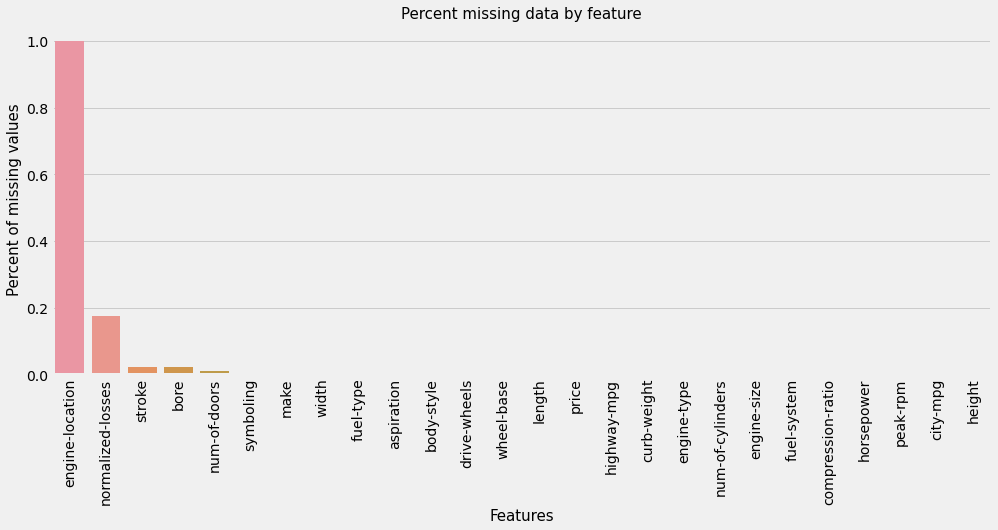

In [57]:
total = auto.isnull().sum().sort_values(ascending=False)
percent = (auto.isnull().sum()/auto.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sb.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

In [58]:
a=auto[auto['engine-size']!='?']
b=(a['engine-size'].astype(int)).mean()
auto['engine-size']=auto['engine-size'].replace('?',b).astype(int)

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


In [59]:
a=auto[auto['body-style']=='sedan']
a['num-of-doors'].value_counts()

four    78
two     14
Name: num-of-doors, dtype: int64

# PIE CHART 

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


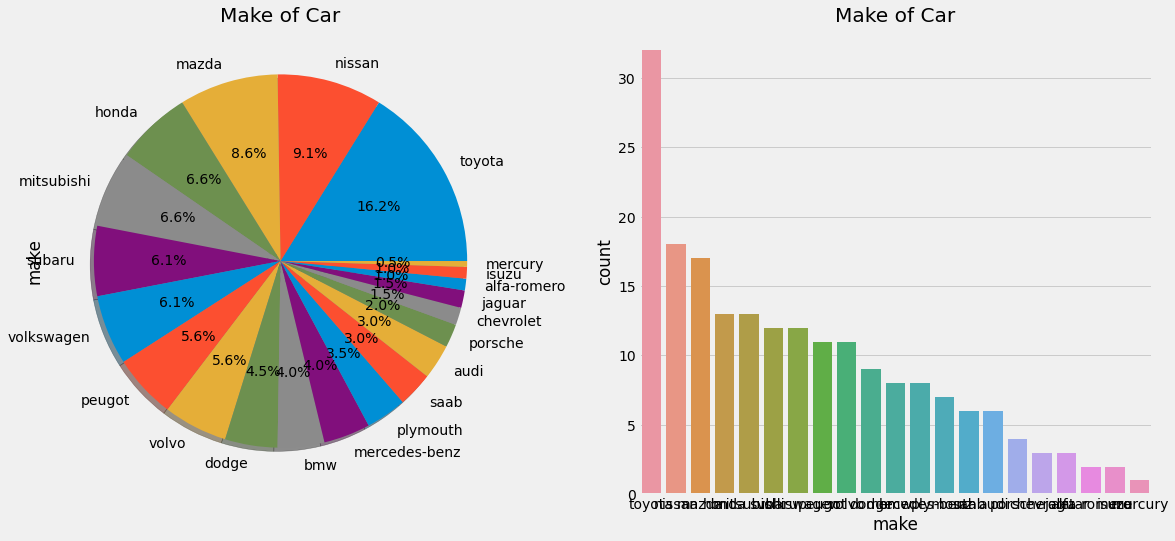

In [60]:
f,ax=plt.subplots(1,2,figsize=(18,8))
auto['make'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Make of Car')
#ax[0].set_ylabel('Count')
sb.countplot('make',data=auto,ax=ax[1],order=auto['make'].value_counts().index)
ax[1].set_title('Make of Car')
#ax[1].set_xticklabels(rotation=30)
plt.show()

In [61]:
auto.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

# CROSS-TAB GRAPH

In [62]:
pd.crosstab(auto.make,auto['fuel-type'],margins=True).T.style.background_gradient(cmap='summer_r')

make,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,saab,subaru,toyota,volkswagen,volvo,All
fuel-type,,,,,,,,,,,,,,,,,,,,,,
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
diesel,0,0,0,0,0,0,0,0,2,4,0,0,1,5,0,0,0,0,3,4,1,20
gas,2,5,8,3,9,13,2,3,15,4,1,13,17,6,7,4,6,12,29,8,10,177
All,2,6,8,3,9,13,2,3,17,8,1,13,18,11,7,4,6,12,32,12,11,198


# HISTOGRAM

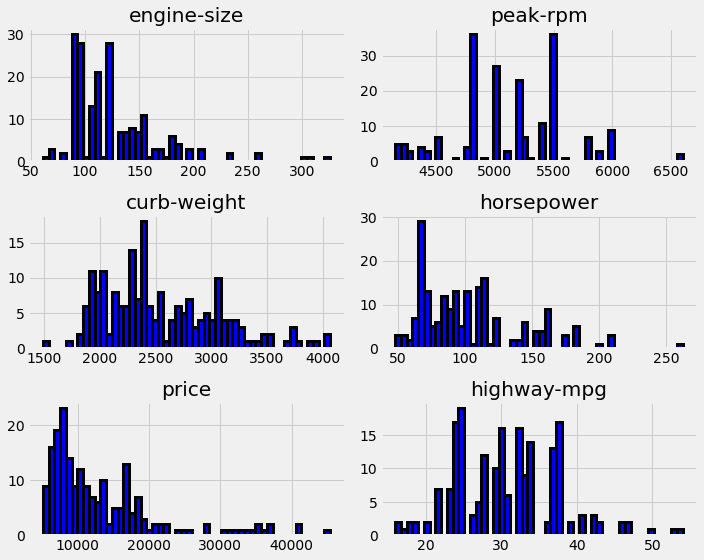

In [63]:
auto[['engine-size','peak-rpm','curb-weight','horsepower','price','highway-mpg']].hist(figsize=(10,8),bins=50,color='b',linewidth='3',edgecolor='k')
plt.tight_layout()
plt.show()

# BAR GRAPH

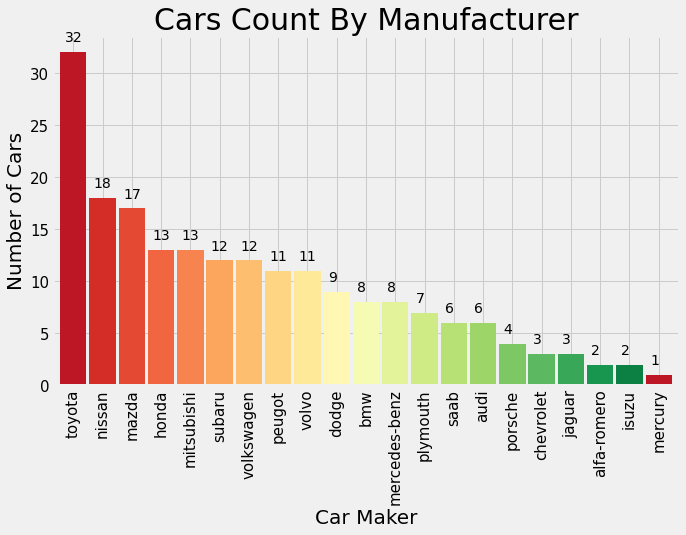

In [64]:
plt.subplots(figsize=(10,6))
ax=auto['make'].value_counts().plot.bar(width=0.9,color=sb.color_palette('RdYlGn',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.xticks(rotation='vertical')
plt.xlabel('Car Maker',fontsize=20)
plt.ylabel('Number of Cars',fontsize=20)
plt.title('Cars Count By Manufacturer',fontsize=30)
ax.tick_params(labelsize=15)
#plt.yticks(rotation='vertical')
plt.show()
plt.show()

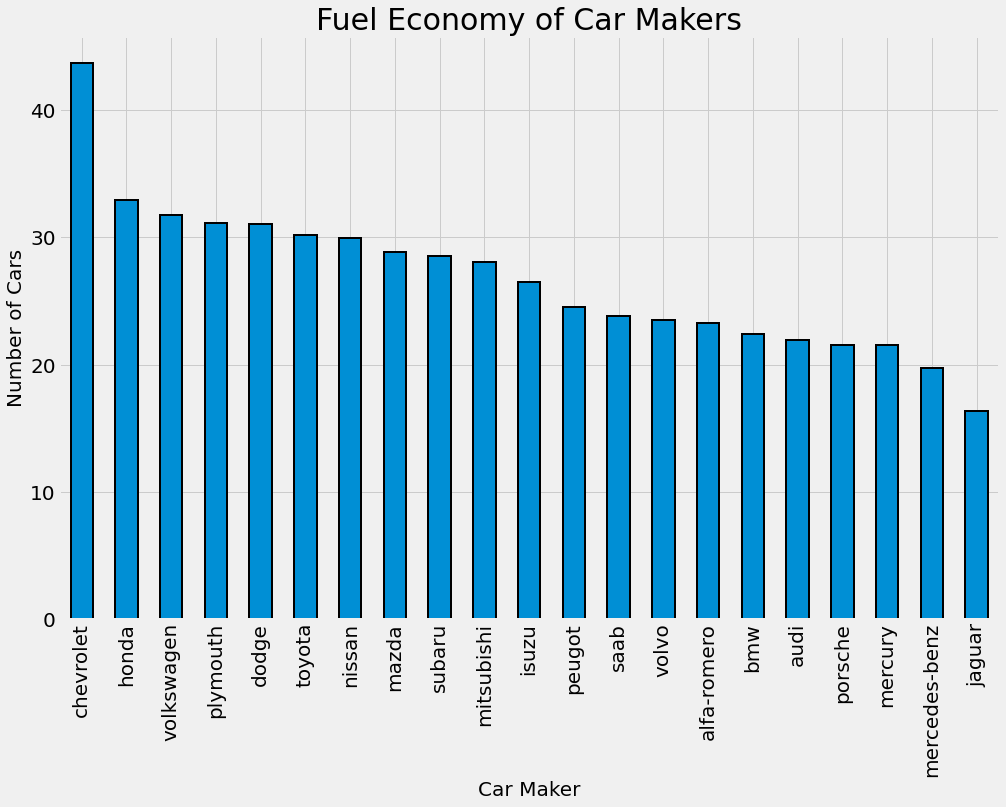

In [65]:
fig = plt.figure(figsize=(15, 10))
mileage=auto.groupby(['make']).mean()
mileage['avg-mpg']=((mileage['city-mpg']+mileage['highway-mpg'])/2)
ax=mileage['avg-mpg'].sort_values(ascending=False).plot.bar(edgecolor='k',linewidth=2)
plt.xticks(rotation='vertical')
plt.xlabel('Car Maker',fontsize=20)
plt.ylabel('Number of Cars',fontsize=20)
plt.title('Fuel Economy of Car Makers',fontsize=30)
ax.tick_params(labelsize=20)
#plt.yticks(rotation='vertical')
plt.show()
plt.show()

# HEAT MAP

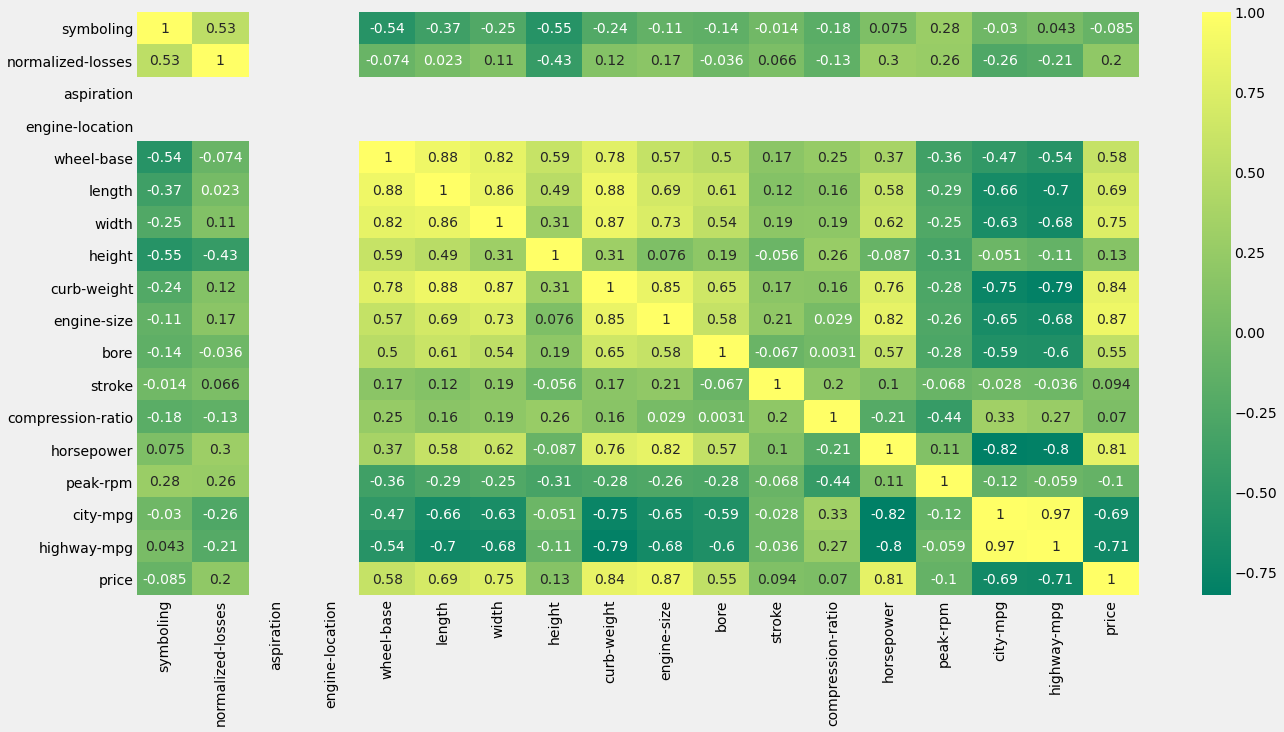

In [66]:
plt.figure(figsize=(20,10))
sb.heatmap(auto.corr(),annot=True,cmap='summer');

# BAR PLOT

<AxesSubplot:>

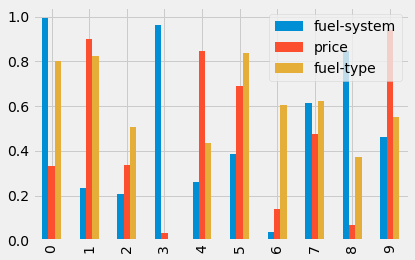

In [67]:
car = pd.DataFrame(np.random.rand(10, 3), columns =['fuel-system', 'price', 'fuel-type'])
car.plot.bar()

# HISTOGRAM

array([[<AxesSubplot:title={'center':'fuel-system'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'fuel-type'}>, <AxesSubplot:>]],
      dtype=object)

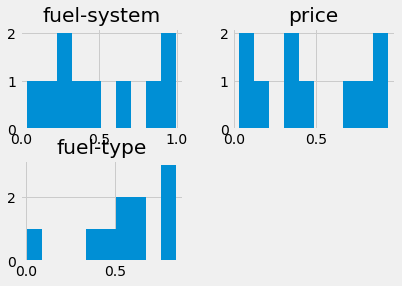

In [68]:
car.hist()

# BOX PLOT

NameError: name 'sns' is not defined

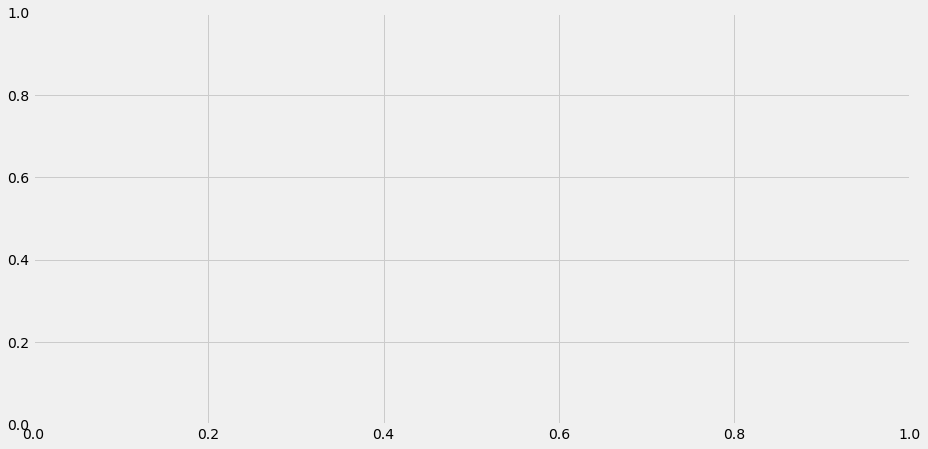

In [69]:
plt.subplots(figsize = (14,24))
plt.subplot(3,1,1)
sns.boxplot(x= auto['body-style'] , y= auto['engine-size'] ,hue= auto["fuel-type"])
plt.subplot(3,1,2)
sns.boxplot(x=auto['body-style'], y=auto["wheel-base"], hue=auto["fuel-type"])
plt.subplot(3,1,3)
sns.boxplot(x=auto['body-style'],y=auto["width"] , hue=auto["fuel-type"])
plt.show()

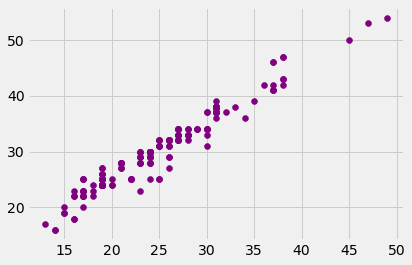

In [70]:
x=auto["city-mpg"]
y=auto["highway-mpg"]
plt.scatter(x,y, c ="purple") 
plt.show() 